## Substitution with smaller LeakyReLu, Conv-s and ZeroPadding
### This is very first attempt with LeakyReLU
Substitution presented here is very well described under this link:

[https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolutional_neural_networks.html](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/convolutional_neural_networks.html)

Each image 106x79x1

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16464584643074866572, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 356122624
 locality {
   bus_id: 1
 }
 incarnation: 15010918190853181526
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"]

In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
from sklearn.utils import shuffle
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
width, height = 106, 79
train_data_dir = '../gen_x3_3/train'
test_data_dir = '../gen_x3_3/test'
nb_train_samples = 47232
nb_test_samples = 11808
epochs = 20
batch_size = 1024

input_shape = (width, height, 1)

In [4]:
model = Sequential()
model.add(ZeroPadding2D(padding=(4, 4), name='zeropad1', input_shape=input_shape))
model.add(Conv2D(32, (9, 9), strides=(2, 2), padding='same', name='conv1'))
model.add(LeakyReLU(alpha=1e-2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='maxpool1'))

# same as:
# ZeroPadding2D(padding(4, 4))
# Conv2D(64, kernel_size(9, 9), strides=(1, 1), padding='same')
model.add(ZeroPadding2D(padding=(1, 1), name='block1zeropad1'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', name='block1_conv1'))
model.add(LeakyReLU(alpha=1e-2))
model.add(ZeroPadding2D(padding=(1, 1), name='block1zeropad2'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', name='block1_conv2'))
model.add(LeakyReLU(alpha=1e-2))
model.add(ZeroPadding2D(padding=(1, 1), name='block1zeropad3'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', name='block1_conv3'))
model.add(LeakyReLU(alpha=1e-2))
model.add(ZeroPadding2D(padding=(1, 1), name='block1zeropad4'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', name='block1_conv4'))
model.add(LeakyReLU(alpha=1e-2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='maxpool2'))

# same as:
# ZeroPadding2D(padding(1, 1))
# model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Conv2D(64, kernel_size=(1, 1), strides=(1, 1), padding='same', name='block2_conv1'))
model.add(LeakyReLU(alpha=1e-2))
model.add(ZeroPadding2D(padding=(1, 1), name='block2zeropad2'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='valid', name='block2_conv2'))
model.add(LeakyReLU(alpha=1e-2))
model.add(Conv2D(128, kernel_size=(1, 1), strides=(1, 1), padding='same', name='block2_conv3'))
model.add(LeakyReLU(alpha=1e-2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='maxpool3'))

# same as:
# ZeroPadding2D(padding(1, 1))
# model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'))
model.add(Conv2D(64, kernel_size=(1, 1), strides=(1, 1), padding='same', name='block3_conv1'))
model.add(LeakyReLU(alpha=1e-2))
model.add(ZeroPadding2D(padding=(1, 1), name='block3zeropad1'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='valid', name='block3_conv2'))
model.add(LeakyReLU(alpha=1e-2))
model.add(Conv2D(128, kernel_size=(1, 1), strides=(1, 1), padding='same', name='block3_conv3'))
model.add(LeakyReLU(alpha=1e-2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='maxpool4'))

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', name='block4_conv1'))
model.add(LeakyReLU(alpha=1e-2))
model.add(Flatten())

model.add(Dense(1024))
model.add(LeakyReLU(alpha=1e-2))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(LeakyReLU(alpha=1e-2))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [6]:
# summarize model and apply checkpoints
print(model.summary())
filepath = 'subst_LReLU/subst_LReLU_106x79-{epoch:02d}-{loss:.4f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zeropad1 (ZeroPadding2D)     (None, 114, 87, 1)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 57, 44, 32)        2624      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 57, 44, 32)        0         
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 29, 22, 32)        0         
_________________________________________________________________
block1zeropad1 (ZeroPadding2 (None, 31, 24, 32)        0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 31, 24, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 31, 24, 64)        0         
__________

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.20,
    zoom_range=0.15,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(width, height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    classes=['1', '2', '3', '4', '5', '6'],
    shuffle=True,
    seed=2018)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width, height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    classes=['1', '2', '3', '4', '5', '6'],
    shuffle=True,
    seed=2018)

Found 47232 images belonging to 6 classes.
Found 11808 images belonging to 6 classes.


In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    verbose=1,
    callbacks=callbacks_list,
    shuffle=True,
    validation_data=test_generator,
    validation_steps=nb_test_samples // batch_size)

Epoch 1/20
46/46 [==============================] - 61s 1s/step - loss: 1.7919 - acc: 0.1656 - val_loss: 1.7918 - val_acc: 0.1673
Epoch 2/20
46/46 [==============================] - 54s 1s/step - loss: 1.7918 - acc: 0.1660 - val_loss: 1.7918 - val_acc: 0.1678
Epoch 3/20
46/46 [==============================] - 55s 1s/step - loss: 1.7919 - acc: 0.1659 - val_loss: 1.7918 - val_acc: 0.1669
Epoch 4/20
46/46 [==============================] - 53s 1s/step - loss: 1.7919 - acc: 0.1643 - val_loss: 1.7918 - val_acc: 0.1673
Epoch 5/20
46/46 [==============================] - 55s 1s/step - loss: 1.7918 - acc: 0.1670 - val_loss: 1.7918 - val_acc: 0.1665
Epoch 6/20
46/46 [==============================] - 54s 1s/step - loss: 1.7918 - acc: 0.1675 - val_loss: 1.7918 - val_acc: 0.1659
Epoch 7/20
46/46 [==============================] - 56s 1s/step - loss: 1.7918 - acc: 0.1617 - val_loss: 1.7918 - val_acc: 0.1657
Epoch 8/20
46/46 [==============================] - 57s 1s/step - loss: 1.7918 - acc: 0.16

In [10]:
score = model.evaluate_generator(test_generator)
print("Accuracy: %.2f%%" % (score[1]*100))
print('Test loss:', score[0])
print('Test accuracy', score[1])

Accuracy: 16.67%
Test loss: 1.7917614451591886
Test accuracy 0.16666666666666666


In [11]:
model_json = model.to_json()
with open('subst_LReLU_106x79_model.json', 'w') as json_file:
    json_file.write(model_json)
    
model.save_weights('subst_LReLU_106x79_weights.h5')
print('Saved model weights')

Saved model weights


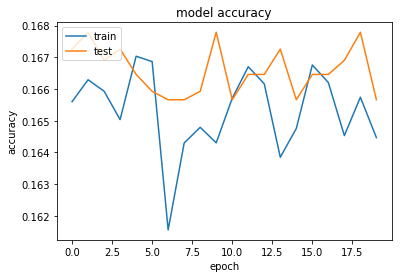

In [12]:
#summarize for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

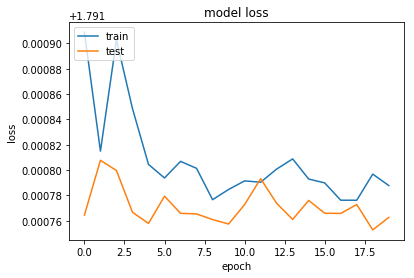

In [13]:
#summarize for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
plot_model(model, to_file='subst_LReLU/subst_LReLU_106x79_plot.png', show_shapes=True, show_layer_names=True)